<a href="https://colab.research.google.com/github/alina-bogdanovskaya/Algorithms-and-Data-Structures-Python-/blob/lesson8/Lesson8_task2_dijkstra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. Доработать алгоритм Дейкстры (рассматривался на уроке), чтобы он дополнительно возвращал список вершин, которые необходимо обойти.

In [6]:
from collections import deque, defaultdict
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [7]:
gr = [[0, 0, 1, 1, 9, 0, 0, 0], 
      [0, 0, 9, 4, 0, 0, 5, 0],
      [0, 9, 0, 0, 3, 0, 6, 0], 
      [0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 1, 0], 
      [0, 0, 0, 0, 0, 0, 5, 0],
      [0, 0, 7, 0, 8, 1, 0, 0],
      [0, 0, 0, 0, 0, 1, 2, 0]]

{(0, 2): Text(0.4999999913068337, 0.5000000052158999, '1'),
 (0, 3): Text(0.14644663792737422, 0.3535533936135803, '1'),
 (0, 4): Text(2.632505458066703e-08, -2.5332959951238047e-08, '9'),
 (1, 2): Text(0.35355337970451406, 0.853553380451053, '9'),
 (1, 3): Text(2.632505458066703e-08, 0.7071067688487334, '4'),
 (1, 6): Text(0.3535534075226478, -0.14644659322389242, '5'),
 (2, 1): Text(0.35355337970451406, 0.853553380451053, '9'),
 (2, 4): Text(-0.4999999823681117, 0.49999996150451276, '3'),
 (2, 6): Text(1.0431801148065664e-08, 1.83784272245191e-08, '6'),
 (4, 6): Text(-0.499999954549978, -0.5000000121704327, '1'),
 (5, 6): Text(-0.35355337274997994, -0.8535533138918769, '5'),
 (6, 2): Text(1.0431801148065664e-08, 1.83784272245191e-08, '7'),
 (6, 4): Text(-0.499999954549978, -0.5000000121704327, '8'),
 (6, 5): Text(-0.35355337274997994, -0.8535533138918769, '1'),
 (7, 5): Text(-6.308191025095056e-08, -0.7071067618942005, '1'),
 (7, 6): Text(0.3535533479180046, -0.8535534032988418, '2')

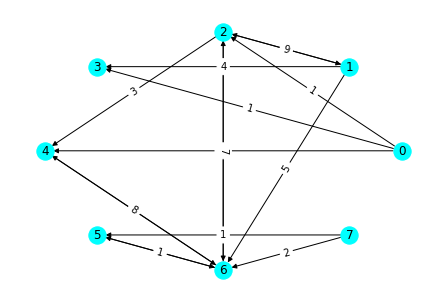

In [8]:
A = np.array(gr)
G = nx.from_numpy_matrix(A, create_using=nx.DiGraph) 
layout = nx.circular_layout(G)
nx.draw(G, layout, node_color = 'cyan', with_labels = True)
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels)

In [9]:
def Dijkstra(graph, start):
  n = len(graph)
  is_visited = [False for _ in range(n)]
  all_costs = [float('inf') for _ in range(n)]
  all_costs[start] = 0
  parent = [None for _ in range(n)]
  parent[start] = start

  while True:
    min_cost = float('inf')
    current = None
    for i, cost in enumerate(all_costs):
      if cost < min_cost and not is_visited[i]:
        min_cost = cost
        current = i
            
    if current == None:
      break

    is_visited[current] = True

    for j, add_cost in enumerate(graph[current]):
      if is_visited[j] or add_cost == 0:
        continue
      
      total_cost = min_cost + add_cost

      if all_costs[j] > total_cost:
        all_costs[j] = total_cost
        parent[j] = current


  nodes_to_visit = defaultdict()
  
  for v in range(n):
    if parent[v] is None:
      nodes_to_visit[v] = "No way"
      continue
    
    way = deque()
    way.append(v)
    current_node = v

    while way[0] != start:
      way.appendleft(parent[way[0]])
    
    nodes_to_visit[v] = (way, all_costs[v])

  return nodes_to_visit


In [10]:
start = int(input('Enter vertex: '))
Dijkstra(gr, start)

Enter vertex: 7


defaultdict(None,
            {0: 'No way',
             1: (deque([7, 6, 2, 1]), 18),
             2: (deque([7, 6, 2]), 9),
             3: (deque([7, 6, 2, 1, 3]), 22),
             4: (deque([7, 6, 4]), 10),
             5: (deque([7, 5]), 1),
             6: (deque([7, 6]), 2),
             7: (deque([7]), 0)})